map out the obstacles and the the target position
```bash
rostopic echo /map -n 1 >> test.txt
```

{'obstacles': [{'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.908328909874, 'y': -5.08246707916, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.817337532043, 'y': -4.99810934067, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.452459831238, 'y': -3.28351449966, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.394375224113, 'y': -3.22000718117, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.177743781805, 'y': -7.17993497849, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715790348, 'nsecs': 165077981}, 'frame_id': 'base_link'}, 'point': {'x': -0.0926617574692, 'y': -7.89002466202, 'z': 0.

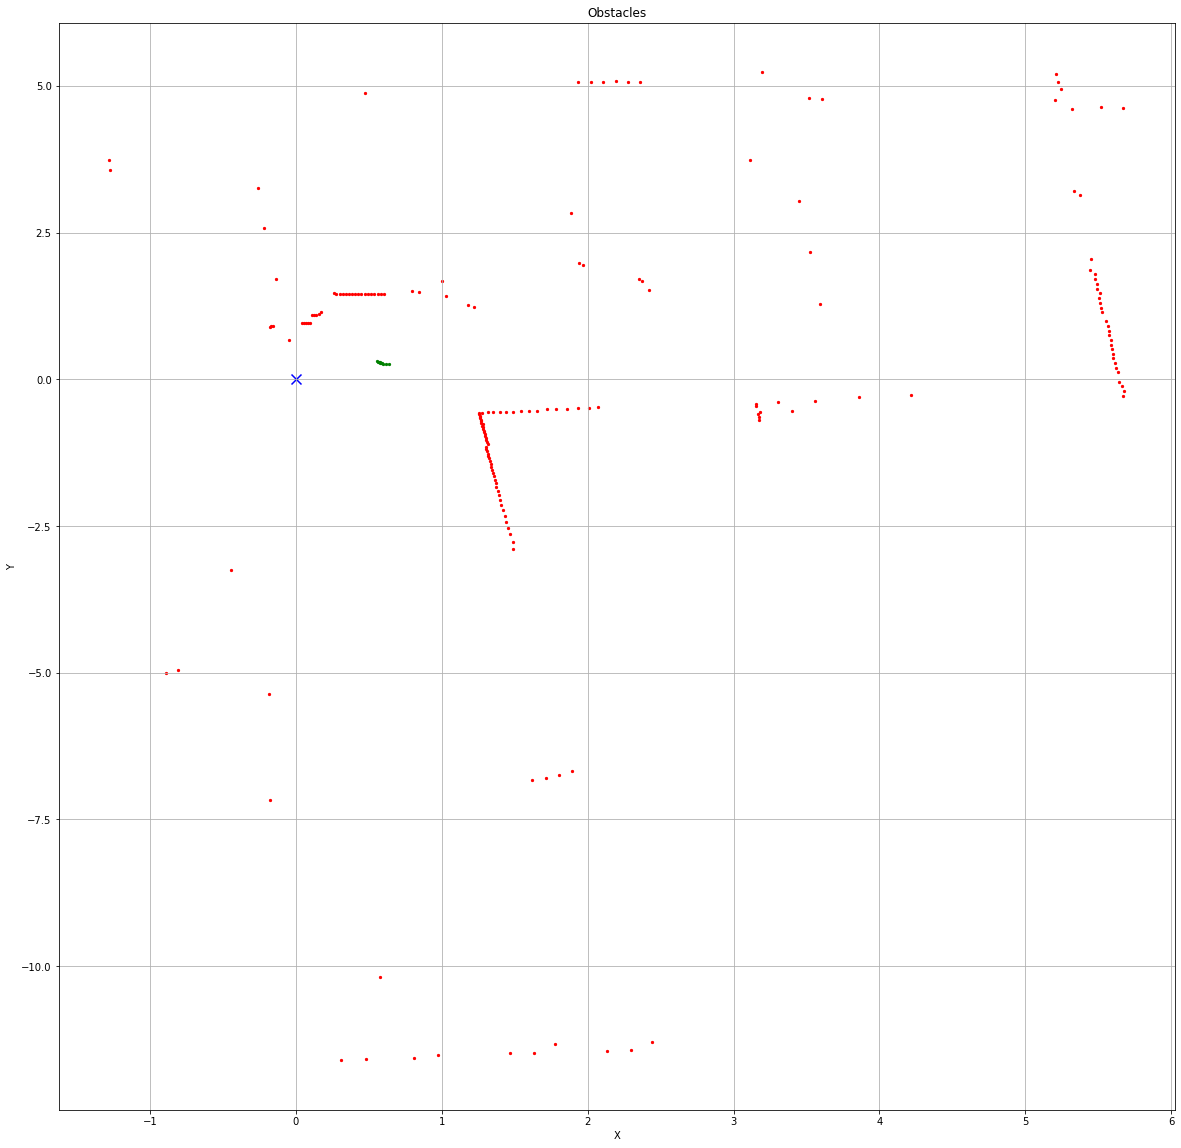

In [86]:
import yaml
import matplotlib.pyplot as plt

def read_obstacles(file_path):
    obstacles = []
    goal = []
    with open(file_path, 'r') as file:
        for data in yaml.safe_load_all(file):
            if data is None:
                continue
            print(data)
            if data['goal'] :
                goal = ([(goal['point']['x'], goal['point']['y'], goal['point']['z']) for goal in data['goal']])
            if data['obstacles'] :
                obstacles = ([(obstacle['point']['x'], obstacle['point']['y'], obstacle['point']['z']) for obstacle in data['obstacles']])
    return obstacles, goal

def plot_obstacles(obstacles, goals):
    x_values = [obstacle[0] for obstacle in obstacles]
    y_values = [obstacle[1] for obstacle in obstacles]
    x_values_goal = [goal[0] for goal in goals]
    y_values_goal = [goal[1] for goal in goals]
    

    plt.figure(figsize=(20,20))
    plt.scatter(x_values, y_values, color='r', marker='o',s=5)
    plt.scatter([0], [0], color='b', marker='x',s=100)
    plt.scatter(x_values_goal, y_values_goal, color='g', marker='o', s=5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Obstacles')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "test.txt"
    obstacles, goal = read_obstacles(file_path)
    plot_obstacles(obstacles, goal)
